# EDA

In [138]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dt import LinearRegressionClassifier

In [140]:
data_bodymass = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv");

In [141]:
display(data_bodymass)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [142]:
data_bodymass.drop(data_bodymass.columns[0], axis=1, inplace=True)

In [143]:
display(data_bodymass)

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


In [144]:
data_bodymass.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


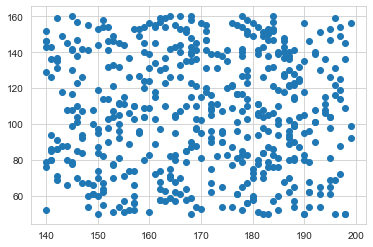

In [145]:
plt.scatter(data_bodymass['Height'], data_bodymass['Weight'])
plt.show()

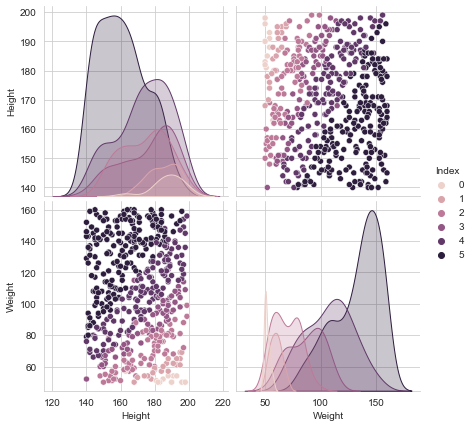

In [146]:
sns.set_style("whitegrid");
sns.pairplot(data_bodymass, hue="Index", height=3);
plt.show();

In [147]:
display(data_bodymass.isnull().sum(axis=0));

Height    0
Weight    0
Index     0
dtype: int64

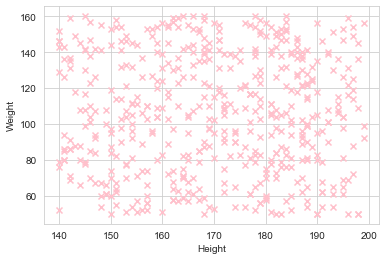

In [148]:
%matplotlib inline
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(data_bodymass.Height, data_bodymass.Weight, color='pink', marker='x')

C:\Users\Zeynep\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


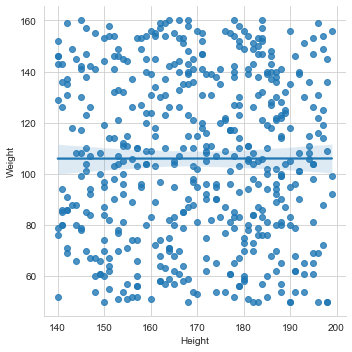

In [149]:
sns.lmplot(x='Height', y='Weight', data=data_bodymass, sharex=True)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

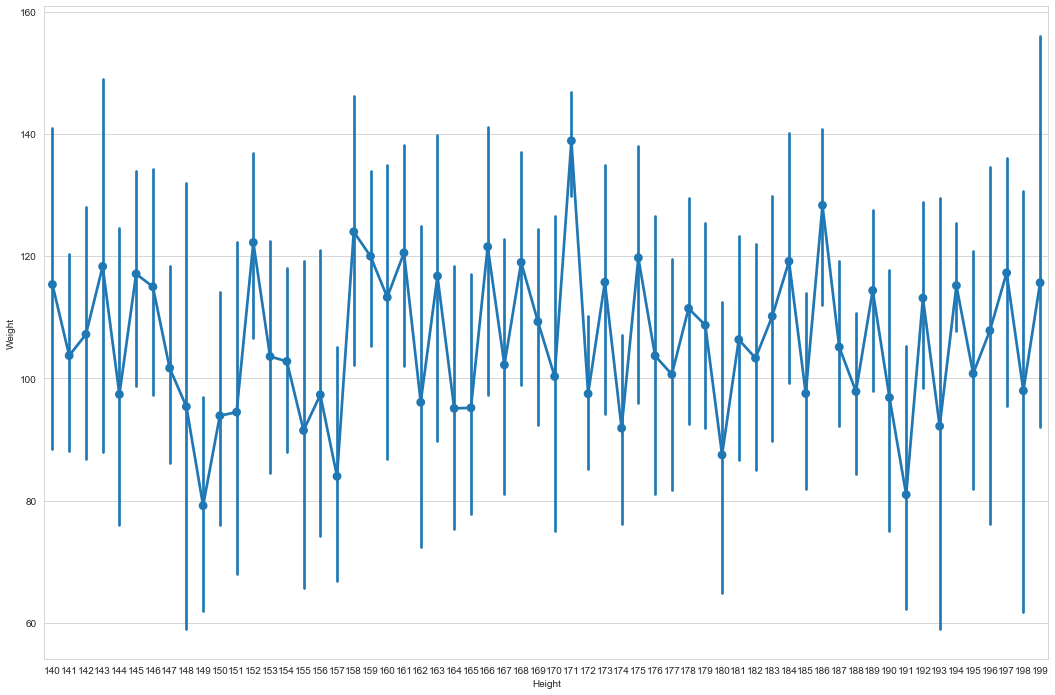

In [150]:
plt.figure(figsize=(18,12))
sns.pointplot(x='Height', y='Weight', data=data_bodymass)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

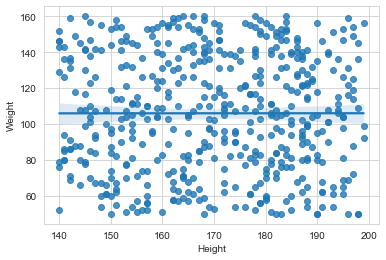

In [151]:
sns.regplot(x='Height', y='Weight', data=data_bodymass)

C:\Users\Zeynep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height'>

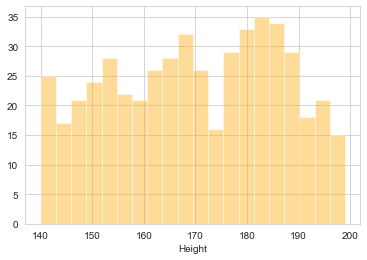

In [152]:
sns.distplot(data_bodymass['Height'].dropna(), kde=False, bins=20, color='Orange')

<AxesSubplot:xlabel='Weight'>

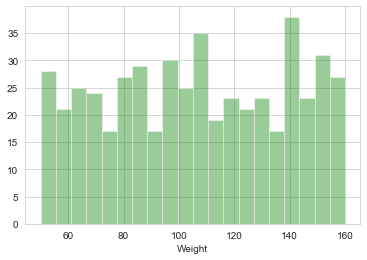

In [153]:
sns.distplot(data_bodymass['Weight'].dropna(), kde=False, bins=20, color='Green')

In [154]:
data_bodymass.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [155]:
model = LinearRegressionClassifier()

In [156]:
x= data_bodymass.values.tolist();
y=[];
for row in x:
    y.append(int(row[2]));
    del row[2];
x= pd.Series(x);
y= pd.Series(y);
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True);

In [157]:
x_train_list= x_train.values.tolist();
y_train_list= y_train.values.tolist();
x_test_list= x_test.values.tolist();
y_test_list= y_test.values.tolist();